Lending Club Project

Lending Club is the world’s largest peer to peer marketplace connecting borrowers and investors.  Customers interested in a loan complete a simple application.  LendingClub quickly assesses risk, determines a credit rating and assigns an appropriate interest rate.  Individual investors fund small portions of the loans that they find attractive.  Lending Club provides 36 loan/borrower features to help investors manage risk when choosing loans.  

Questions:
a) Using historical data, is it possible to identify the critical few features that most accurately predict defaults?

b) Is it possible to manually build a portfolio of loans that consistently outperforms Lending Club's automated, "portfolio builder" allocations?

Methodology

1. Download and combine.csv files into a single data frame
3. Remove unnessary columns
4. Clean up columns with format problems
6. Replace null values
7. Sort columns by datatype
8. Run 

In [296]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import requests
import csv
import datetime as dt
%matplotlib inline
import seaborn as sns
%pylab inline
pd.options.display.mpl_style = 'default'
import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',200)

Populating the interactive namespace from numpy and matplotlib


In [297]:
# Read and combine files
loanData1 = pd.read_csv('/Users/chrispiccin/metis_class_project/data/Lending_Club/LoanStats3a.csv')
loanData2 = pd.read_csv('/Users/chrispiccin/metis_class_project/data/Lending_Club/LoanStats3b.csv')
loanData3 = pd.read_csv('/Users/chrispiccin/metis_class_project/data/Lending_Club/LoanStats3c.csv')
loanData4 = pd.read_csv('/Users/chrispiccin/metis_class_project/data/Lending_Club/LoanStats3d.csv')
LoanData = pd.concat([loanData1, loanData2, loanData3, loanData4], ignore_index=True)

In [298]:
# Only some data is avail prior to loan selection.  Drop unused columns
LoanData.drop(LoanData[['id','member_id','grade','url','zip_code','addr_state','application_type','funded_amnt','funded_amnt_inv','installment','emp_title','pymnt_plan','desc','title','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','policy_code','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']], axis=1, inplace=True)

In [299]:
LoanData.dtypes

loan_amnt                      float64
term                            object
int_rate                        object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
purpose                         object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                      object
total_acc                      float64
mths_since_last_major_derog    float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal              

In [300]:
LoanData.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,36 months,10.65%,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,NaN,0.0,NaN,NaN
1,2500.0,60 months,15.27%,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,NaN,0.0,NaN,NaN
2,2400.0,36 months,15.96%,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,NaN,0.0,NaN,NaN
3,10000.0,36 months,13.49%,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,NaN,0.0,NaN,NaN
4,3000.0,60 months,12.69%,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,other,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,NaN,0.0,NaN,NaN


In [301]:
# Remove all loans that are still in progress
LoanData = LoanData[[x in ['Charged Off','Default','Fully Paid','Does not meet the credit policy.  Status:Charged Off','Does not meet the credit policy.  Status:Default','Does not meet the credit policy.  Status:Fully Paid'] for x in LoanData['loan_status']]]
LoanData.index = range(len(LoanData))

In [302]:
# Count of Loans by status
LoanData.loan_status.value_counts()

Fully Paid     251122
Charged Off     56773
Default           281
Name: loan_status, dtype: int64

In [303]:
# Group defaulted and charged off loans, 1 == good loans, 0 == bad loans
LoanData['loan_status'] = [1 if x == "Fully Paid" else 0 for x in LoanData['loan_status']]
LoanData['loan_status'] = LoanData['loan_status'].astype(str)

In [304]:
# More than 22% of closed loans are bad loans
LoanData.loan_status.value_counts()

1    251122
0     57054
Name: loan_status, dtype: int64

In [305]:
# Convert 'term' to catigorical
LoanData['term'] = [0 if x == " 36 months" else 1 for x in LoanData['term']]
LoanData['term'] = LoanData['term'].astype(str)

In [306]:
# Clean up interest rate
LoanData['int_rate'] = LoanData['int_rate'].str.replace('%', '')
LoanData['int_rate'] = LoanData['int_rate'].astype(float)

In [307]:
# Convert 'sub_grade' to categorical
LoanData = LoanData[pd.isnull(LoanData['sub_grade']) == 0]
LoanData.index = range(len(LoanData))
sub_grades_cat = pd.get_dummies(LoanData['sub_grade'])
LoanData = pd.concat([LoanData, sub_grades_cat], axis=1)
LoanData = LoanData.drop(['sub_grade'], 1)

In [308]:
# Convert 'emp_length' to categorical
emp_years = dict(zip(LoanData['emp_length'].unique(), np.arange(LoanData['emp_length'].nunique())))
LoanData['emp_length'] = LoanData['emp_length'].map(lambda x: emp_years[x])
LoanData['emp_length'] = LoanData['emp_length'].astype(float)

In [309]:
# Loan distribution by home ownership
LoanData.home_ownership.value_counts()

MORTGAGE    152499
RENT        128312
OWN          27180
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [310]:
# Remove 'OTHER', 'NONE' and 'ANY' categories from home_ownership
LoanData = LoanData[[x in ['MORTGAGE','RENT','OWN'] for x in LoanData['home_ownership']]]
LoanData.index = range(len(LoanData))

# Convert 'home_ownership' to categorical
home_ownership = pd.get_dummies(LoanData['home_ownership'])
LoanData = pd.concat([LoanData, home_ownership], axis=1)
LoanData = LoanData.drop(['home_ownership'], 1)

In [311]:
LoanData.verification_status.value_counts()

Verified           112109
Not Verified       102657
Source Verified     93225
Name: verification_status, dtype: int64

In [312]:
# Convert 'verification_status' to categorical
LoanData['verification_status'] = [1 if x == "Verified" else 0 for x in LoanData['verification_status']]
LoanData['verification_status'] = LoanData['verification_status'].astype(str)

In [313]:
# clean up 'issue_d'
LoanData['issue_month'] = 0
LoanData['issue_year'] = 0
LoanData['issue_month'] = [pd.to_datetime(x).month for x in LoanData['issue_d']]
LoanData['issue_year'] = [pd.to_datetime(x).year for x in LoanData['issue_d']]
LoanData['issue_month'] = LoanData['issue_month'].astype(float)
LoanData['issue_year'] = LoanData['issue_year'].astype(float)
LoanData = LoanData.drop('issue_d', 1)

In [314]:
# Loan distribution by loan purpose
LoanData.purpose.value_counts()

debt_consolidation    181659
credit_card            62372
home_improvement       18232
other                  16826
major_purchase          7274
small_business          5308
car                     4159
medical                 3352
moving                  2359
wedding                 2065
vacation                1888
house                   1872
educational              322
renewable_energy         303
Name: purpose, dtype: int64

In [315]:
# Convert 'purpose' to categorical
purpose = pd.get_dummies(LoanData['purpose'])
LoanData = pd.concat([LoanData, purpose], axis=1)
LoanData = LoanData.drop(['purpose'], 1)

In [316]:
# Clean up 'earliest_cr_line'
LoanData['first_cr_line'] = 0
date = dt.date.today().year
LoanData['first_cr_line'] = [date-pd.to_datetime(x).year for x in LoanData['earliest_cr_line']]
LoanData['first_cr_line'] = LoanData['first_cr_line'].astype(float)
LoanData.drop(LoanData[['earliest_cr_line']], axis=1, inplace=True)

In [317]:
# Clean up 'revol_util'
LoanData['revol_util'] = LoanData['revol_util'].str.replace('%', '')
LoanData['revol_util'] = LoanData['revol_util'].astype(float)
LoanData['revol_util'] = [0 if pd.isnull(x) else x for x in LoanData['revol_util']]

In [318]:
# check for missing values
LoanData.isnull().sum()

loan_amnt                           0
term                                0
int_rate                            0
emp_length                          0
annual_inc                          0
verification_status                 0
loan_status                         0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         169437
mths_since_last_record         267615
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
mths_since_last_major_derog    246127
acc_now_delinq                      0
tot_coll_amt                    64474
tot_cur_bal                     64474
A1                                  0
A2                                  0
A3                                  0
A4                                  0
A5                                  0
B1          

In [319]:
# Clear nulls in 'mths_since_last_delinq'
LoanData['mths_since_last_delinq'] = [500 if pd.isnull(x) else x for x in LoanData['mths_since_last_delinq']]

In [320]:
# Clear nulls in 'mths_since_last_record'
LoanData['mths_since_last_record'] = [500 if pd.isnull(x) else x for x in LoanData['mths_since_last_record']]

In [321]:
# Clear nulls in 'mths_since_last_major_derog'
LoanData['mths_since_last_major_derog'] = [500 if pd.isnull(x) else x for x in LoanData['mths_since_last_major_derog']]

In [322]:
# Clear nulls in 'tot_coll_amt'
LoanData['tot_coll_amt'] = [0 if pd.isnull(x) else x for x in LoanData['tot_coll_amt']]

In [323]:
# Clear nulls in 'tot_cur_bal'
LoanData['tot_cur_bal'] = [0 if pd.isnull(x) else x for x in LoanData['tot_cur_bal']]

In [324]:
LoanData.shape

(307991, 76)

In [325]:
LoanData.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,MORTGAGE,OWN,RENT,issue_month,issue_year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,first_cr_line
0,5000.0,0,10.65,0.0,24000.0,1,1,27.65,0.0,1.0,500.0,500.0,3.0,0.0,13648.0,83.7,9.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
1,2500.0,1,15.27,1.0,30000.0,0,0,1.00,0.0,5.0,500.0,500.0,3.0,0.0,1687.0,9.4,4.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,2400.0,0,15.96,0.0,12252.0,0,1,8.72,0.0,2.0,500.0,500.0,2.0,0.0,2956.0,98.5,10.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0
3,10000.0,0,13.49,0.0,49200.0,0,1,20.00,0.0,1.0,35.0,500.0,10.0,0.0,5598.0,21.0,37.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0
4,5000.0,0,7.90,2.0,36000.0,0,1,11.20,0.0,3.0,500.0,500.0,9.0,0.0,7963.0,28.3,12.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0


In [341]:
# rearrange columns
cols = ["loan_amnt","term","int_rate","emp_length","annual_inc","verification_status","loan_status","dti","delinq_2yrs","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","mths_since_last_major_derog","acc_now_delinq","tot_coll_amt","tot_cur_bal","A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5","MORTGAGE","OWN","RENT","issue_month","issue_year","car","credit_card","debt_consolidation","educational","home_improvement","house","major_purchase","medical","moving","other","renewable_energy","small_business","vacation","wedding","first_cr_line"]
cols = cols[0:1]+cols[2:5]+cols[59:61]+cols[76:77]+cols[7:59]+cols[61:77]+cols[1:2]+cols[5:6]+cols[6:7]
LoanData = LoanData[cols]
LoanData.head()

,loan_amnt,int_rate,emp_length,annual_inc,issue_month,issue_year,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,first_cr_line,term,verification_status,loan_status
0,5000.0,10.65,0.0,24000.0,12.0,2011.0,27.65,0.0,1.0,500.0,500.0,3.0,0.0,13648.0,83.7,9.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,1,1
1,2500.0,15.27,1.0,30000.0,12.0,2011.0,1.00,0.0,5.0,500.0,500.0,3.0,0.0,1687.0,9.4,4.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1,0,0
2,2400.0,15.96,0.0,12252.0,12.0,2011.0,8.72,0.0,2.0,500.0,500.0,2.0,0.0,2956.0,98.5,10.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,0,0,1
3,10000.0,13.49,0.0,49200.0,12.0,2011.0,20.00,0.0,1.0,35.0,500.0,10.0,0.0,5598.0,21.0,37.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,0,0,1
4,5000.0,7.90,2.0,36000.0,12.0,2011.0,11.20,0.0,3.0,500.0,500.0,9.0,0.0,7963.0,28.3,12.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0,0,1


In [327]:
LoanData.shape

(307991, 76)

In [343]:
features = cols[0:-1]
target = cols[-1]

loan_status


In [345]:
sns.plt.figure(figsize=(24,20))
sns.heatmap(LoanData.transpose().corr().values)

ValueError: zero-size array to reduction operation minimum which has no identity

In [332]:
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [333]:
numeric_columns = cols[0:74]
categorical_columns = cols[74:77]
target = cols[-1]

In [335]:
#get categorical features
#drop off last column because its unnecessary
X_categorical = (LoanData[categorical_columns]).astype(int)

#get and transform numeric features
X_numeric = LoanData[numeric_columns]
X_numeric[numeric_columns] = StandardScaler().fit_transform(X_numeric)

#get outcome variable
y = LoanData[target]

#combine transformed categorical and numeric features
X_final = pd.concat((X_numeric,X_categorical),axis=1)

/Users/chrispiccin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [337]:
LoanData.loan_status.value_counts()
LoanData.outcome = (LoanData.loan_status =="AB").astype(int)
X = LoanData[LoanData.columns.tolist()[:-1]]
y = LoanData.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

lr = LogisticRegression(C=1e9)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print "Test set accuracy of LR model: ",metrics.accuracy_score(y_test, y_test_pred)

Test set accuracy of LR model:  0.815353146172


[[  676 16465]
 [  596 74661]]


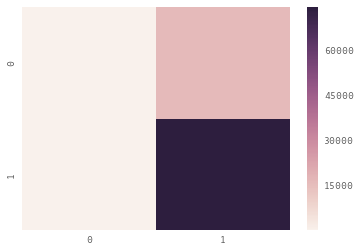

In [338]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm)
print cm